In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
iris = load_iris()

In [3]:
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.DataFrame(iris["target"], columns=["Species"])
df = pd.concat([x, y], axis=1)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
print(df.isnull().values.sum()) # checksums
print(f"Data shapes: {df.shape}\n")
print(f"Title of columns:\n{df.keys()}\n")
print(f"First content of independent variable:\n{df.iloc[0,::]}\n")
print(f"First content of dependent variable:{df['Species'][0]}\n")

0
Data shapes: (150, 5)

Title of columns:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

First content of independent variable:
sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Species              0.0
Name: 0, dtype: float64

First content of dependent variable:0



In [5]:
print(df.groupby("Species").size())

Species
0    50
1    50
2    50
dtype: int64


<Figure size 432x288 with 0 Axes>

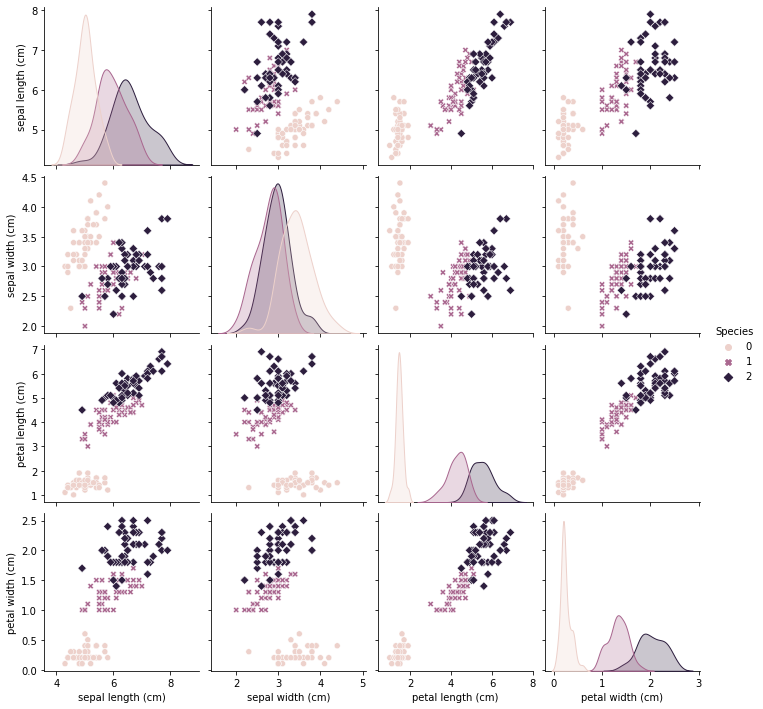

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

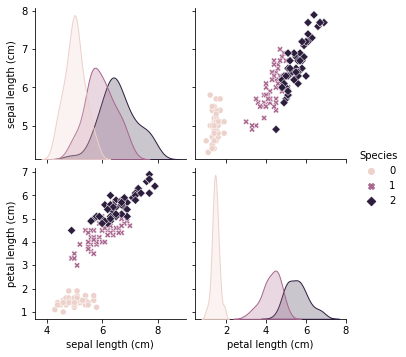

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure()
sns.pairplot(df, hue="Species", markers=["o", "X", "D"])
plt.show()

plt.savefig("./figures/lecture/AllVars.png")

plt.figure()
sns.pairplot(df, hue="Species", markers=["o", "X", "D"], vars=["sepal length (cm)","petal length (cm)"])
plt.show()

plt.savefig("./figures/lecture/SpecVars.png")

# The differnces here is the plt will display all the variables if you're not definited the "vars" argument.

In [7]:
x = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df[["Species"]]

train_x , test_x , train_y , test_y = train_test_split(x, y["Species"], test_size=0.3, random_state=42)

print(f"Shape of trainning datasets: {train_x.shape}")
print(f"Shape of testing datasets: {test_x.shape}")

Shape of trainning datasets: (105, 4)
Shape of testing datasets: (45, 4)


In [8]:
model = KNeighborsClassifier(n_neighbors=3) # The "K" node countes.
model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [9]:
pred_y = model.predict(test_x)
print(accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Different K nodes testing

As the fundenmental of KNN learning method.  
Controlling the K nodes is the core for this learning.  
  
Regarding to the theroem shown, $K_{nodes} = \left \{ x \in \mathbb{N}: x \geq 3 \right \}$  
We'd like to test the accuracy at any time of the K nodes

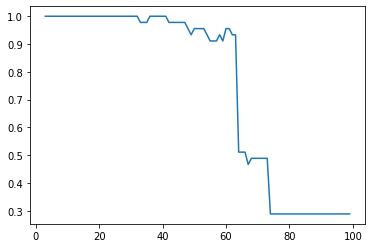

In [10]:
accuracy = list()

for nodes in range(3, 100):
    model = KNeighborsClassifier(n_neighbors=nodes)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    accuracy.append(accuracy_score(test_y, pred_y))

nodes = range(3, 100)
plt.plot(nodes, accuracy)
plt.show()

As the figure shown.  
The larger K nodes, the larger error occured.  
  
Then the conclusion is we shall always controlling the K nodes in the square root of data counts.